In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
train_nor = os.path.join('C:/Users/natdanai.intraraksa/Downloads/chest-xray-pneumonia/chest_xray/train/NORMAL')
train_abnor = os.path.join('C:/Users/natdanai.intraraksa/Downloads/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')
val_nor = os.path.join('C:/Users/natdanai.intraraksa/Downloads/chest-xray-pneumonia/chest_xray/val/NORMAL')
val_abnor = os.path.join('C:/Users/natdanai.intraraksa/Downloads/chest-xray-pneumonia/chest_xray/val/PNEUMONIA')
test_nor = os.path.join('C:/Users/natdanai.intraraksa/Downloads/chest-xray-pneumonia/chest_xray/test/NORMAL')
test_abnor = os.path.join('C:/Users/natdanai.intraraksa/Downloads/chest-xray-pneumonia/chest_xray/test/PNEUMONIA')

In [5]:
print('length of normal condition in train dataset is {}'.format(len(os.listdir(train_nor))))
print('length of abnormal condition in train dataset is {}'.format(len(os.listdir(train_abnor))))

length of normal condition in train dataset is 1341
length of abnormal condition in train dataset is 3875


In [6]:
print('length of normal condition in test dataset is {}'.format(len(os.listdir(test_nor))))
print('length of abnormal condition in test dataset is {}'.format(len(os.listdir(test_abnor))))

length of normal condition in test dataset is 234
length of abnormal condition in test dataset is 390


In [7]:
import seaborn as sns

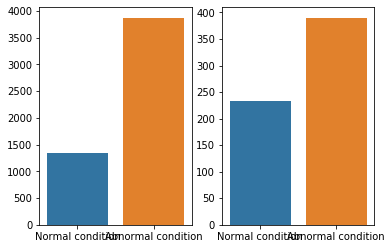

In [33]:
f,[ax1,ax2] = plt.subplots(1,2)
sns.barplot(y = (len(os.listdir(train_nor)),len(os.listdir(train_abnor))), x = ['Normal condition','Abnormal condition'],ax = ax1)
sns.barplot(y = (len(os.listdir(test_nor)),len(os.listdir(test_abnor))), x = ['Normal condition','Abnormal condition'],ax = ax2)

In [5]:
#import nessecerry
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import categorical_crossentropy

In [3]:
#model
model = Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(300,300,3),padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(512,(3,3),activation = 'relu',padding = 'same'))
model.add(Flatten())
model.add(Dense(4096,activation = 'relu'))
model.add(Dense(4096,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))

W0313 14:57:43.177092 15680 deprecation.py:506] From C:\Users\n_int\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.compile(optimizer=Adam(),loss=categorical_crossentropy,metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 256)       2